In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy
import math

In [5]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [6]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


#### Prediction using predefined W and B

In [7]:
def predict_loop(x, w, b):
  n = x.shape[0]
  p = 0
  for i in range(n):
    p += w[i] * x[i]
  p += b
  return p

def predict_vectorized(x, w, b):
  return np.dot(w, x) + b

In [8]:
x_vec = x_train[0, :] # all features of the first row
print(predict_loop(x_vec, w_init, b_init))
print(predict_vectorized(x_vec, w_init, b_init))

459.9999976194083
459.9999976194082


#### Computing Cost

In [9]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0.0

  for i in range(m):
    f_wb = np.dot(x[i], w) + b
    cost += (f_wb - y[i])**2

  cost /= 2*m
  return cost

In [10]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(cost)

1.5578904330213735e-12


#### Gradient Descent with Multiple Values

In [30]:
def compute_gradient(x, y, w, b):
  m, n = x.shape
  dj_dw = np.zeros(n)
  dj_db = 0.0

  for i in range(m):
    err = (np.dot(x[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] += err * x[i, j]
    dj_db += err
  
  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, num_iters, cost):
  J_history = []
  w = copy.deepcopy(w)

  for i in range(num_iters):
    dj_dw, dj_db = compute_gradient(x, y, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db

    if i < 100000:
      J_history.append(cost(x, y, w, b))
    
    if i% math.ceil(num_iters/10) == 0:
      print("Iteration {:4d}, cost is {:8.2f}".format(i,J_history[-1]))

  return w, b, J_history

In [31]:
w = np.zeros_like(w_init)
b = 0.0
alpha = 5.0e-7
iterations = 100000

w_final , b_final, J_hist = gradient_descent(x_train, y_train, w, b, alpha, iterations, compute_cost)

Iteration    0, cost is  2529.46
Iteration 10000, cost is   624.82
Iteration 20000, cost is   594.33
Iteration 30000, cost is   581.01
Iteration 40000, cost is   574.73
Iteration 50000, cost is   571.36
Iteration 60000, cost is   569.18
Iteration 70000, cost is   567.49
Iteration 80000, cost is   566.01
Iteration 90000, cost is   564.61


In [28]:
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final}")

b,w found by gradient descent: -0.00, [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]


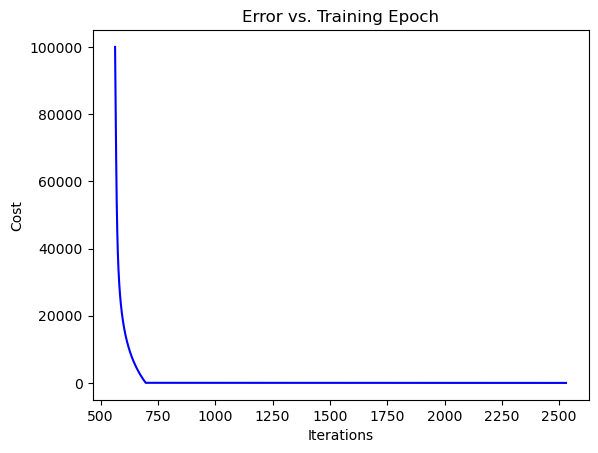

In [24]:
iters = np.arange(iterations)
plt.plot(J_hist, iters, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()